<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Домашнее задание 6: параметрические тесты
</center>

**ФИО:**

Бобылина Инна Владимировна

## Общая информация

__Дата выдачи:__ 23.04.2025

__Дедлайн:__ 23:59MSK 11.05.2025

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### Задача №1: Лучше найди себе девушку! (25 баллов)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [360]:
df = pd.read_csv('dating_is_hard.csv')

In [3]:
df

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids
2,uid_3,31,False,70,m,True,san francisco california,does not have kids
3,uid_4,29,False,66,m,False,martinez california,does not have kids
4,uid_5,30,False,69,m,True,san francisco california,no opinion
...,...,...,...,...,...,...,...,...
995,uid_996,18,False,67,m,True,vallejo california,no opinion
996,uid_997,21,False,70,m,False,san francisco california,does not have kids
997,uid_998,30,False,73,m,False,oakland california,does not have kids
998,uid_999,49,False,71,m,False,san francisco california,no opinion


__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

<Axes: xlabel='height', ylabel='Count'>

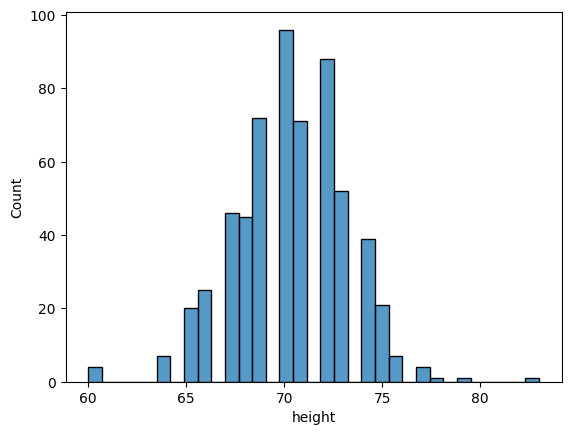

In [ ]:
## your code here
# (⌒_⌒)

# Мужчины
sns.histplot(df[df['sex']=='m']['height'])

#нормальное распределение
#n (кол-во наблюдений) достаточно большое
#нет выбросов

# => выполняются предпосылки для ЦПТ

# H0 : в анкете мужчины указывают реальный рост, не преувеличивают его

In [91]:
#ручной расчет
from scipy import stats
alpha = 0.05                                       # уровень значимости = 5%

n = df[df['sex']=='m']['height'].shape[0]          #размер выборки

mu_hat= df[df['sex']=='m']['height'].mean()        #точечная оценка
mu=176/2.54                                        # Source: https://lady.mail.ru/article/553883-srednij-rost-muzhchin-i-zhenshhin-v-rossii-i-mire/

var_hat=df[df['sex']=='m']['height'].var(ddof=1)   #дисперсия

z_crit = stats.norm.ppf(1 - alpha/2)               # критическое значение z-статистики

left = mu_hat - z_crit*np.sqrt(var_hat/n)          #левая граница доверительного интервала
right = mu_hat + z_crit*np.sqrt(var_hat/n)         #правая граница доверительного интервала
                                    
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))
print("Реальное среднее = {:.4}".format(mu))

Доверительный интервал [70.07; 70.53] ширины 0.4607
Реальное среднее = 69.29


In [98]:
from scipy.stats import norm
mu_hat= df[df['sex']=='m']['height'].mean()
mu=176/2.54 
std=df[df['sex']=='m']['height'].std()
n = df[df['sex']=='m']['height'].shape[0]
z_obs=(mu_hat - mu) / (std / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(np.abs(z_obs)))
print(z_obs, p_value)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу, существует значимая разница.")
else:
    print("Не отвергаем нулевую гипотезу, значимой разницы нет.")

8.610268778483906 0.0
Отвергаем нулевую гипотезу, существует значимая разница.


(70.07297196891389, 70.53369469775276)

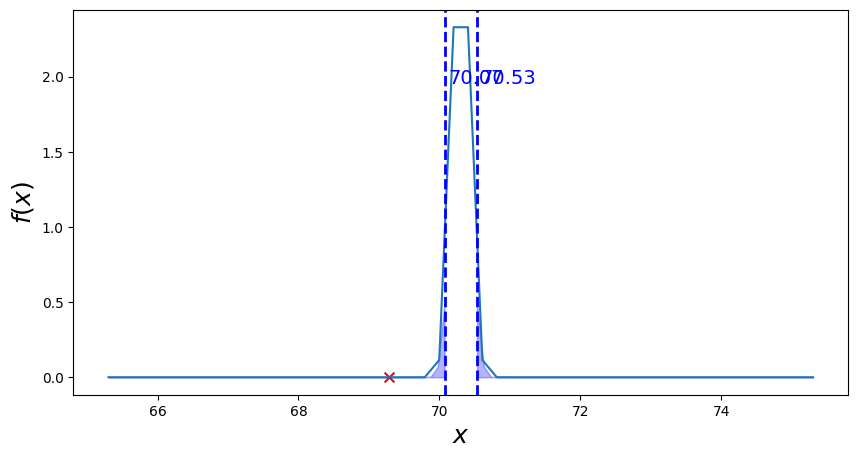

In [81]:
#расчет scipy
def norm_conf_int(alpha, mean_hat, std_hat, margin=5, real_mean=False):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    if real_mean!=False:
        plt.scatter(real_mean, 0, c='red', marker='x', s=50)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

mu_hat = df[df['sex']=='m']['height'].mean()
sd_hat = df[df['sex']=='m']['height'].std(ddof=1)/np.sqrt(df[df['sex']=='m']['height'].shape[0])

norm_conf_int(alpha, mu_hat, sd_hat, margin=5, real_mean=mu)

<Axes: xlabel='height', ylabel='Count'>

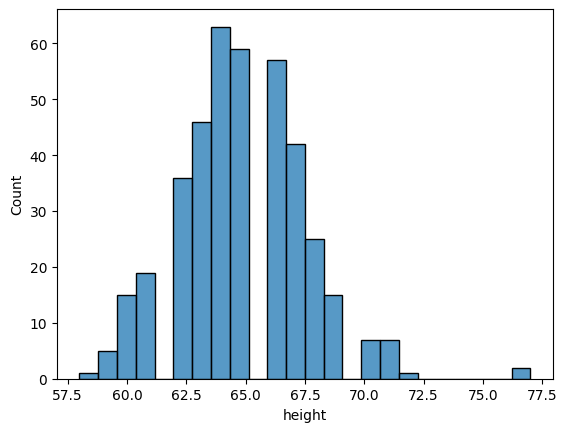

In [82]:
#женщины

sns.histplot(df[df['sex']=='f']['height'])

Реальное среднее = 64.96


(64.56731117582858, 65.09768882417141)

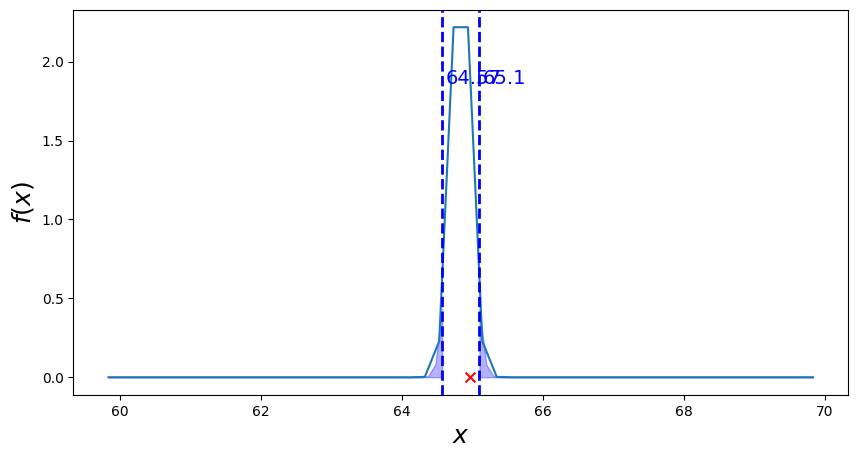

In [83]:
mu_hat = df[df['sex']=='f']['height'].mean()
mu=165/2.54
sd_hat = df[df['sex']=='f']['height'].std(ddof=1)/np.sqrt(df[df['sex']=='f']['height'].shape[0])
print("Реальное среднее = {:.4}".format(mu))
norm_conf_int(alpha, mu_hat, sd_hat, margin=5, real_mean=mu)

__Вывод:__

Т.к. реальное значение среднего роста у мужчин = 69.29 дюймов меньше левой границы доверительнго интервала [70.07; 70.53], расчитанного по выборке, то можно сделать вывод, что мужчины чаще завышают свой рост.


Реальный средний рост женщин = 64.96 дюймов попадает в границв доверительного интервала [64.57, 65.1], расчитанного по выборке, что свидетельствует о том, что женщины скорее всего указывают свой реальный рост.

__б) [10 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

In [361]:
## your code here
# (Д_Д)

drinker_man = df[df['sex']=='m']['is_heavy_drinker']
drinker_woman = df[df['sex']=='f']['is_heavy_drinker']

print(f"Мужчин-алкоголиков {drinker_man.sum()} штук, женщин-алкогольвиц {drinker_woman.sum()} штук")

# H0 - доля мужчтн-алкоголиков выше, чем доля женщин-алкоголиков

Мужчин-алкоголиков 51 штук, женщин-алкогольвиц 31 штук


In [ ]:
alpha = 0.05                                                        # уровень значимости = 5%
n1,n2 = df[df['sex']=='m'].shape[0], df[df['sex']=='f'].shape[0]    # размеры выборок
m1,m2 = drinker_man.sum(), drinker_woman.sum()                      # число алкоголиков

p1=df[df['sex']=='m']['is_heavy_drinker'].mean()
p2=df[df['sex']=='f']['is_heavy_drinker'].mean()                                  # точеные оценки долей 
diff = p1 - p2                                                      # разность долей

P = (m1 + m2)/(n1 + n2)          
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))                         # стандартное отклонение разности
                                    
z_obs = diff/diff_std                                               # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha)                                # критическое значение статистики

if z_obs < z_crit:
    print(f'z_obs = {z_obs:.3} меньше z_crit = {z_crit:.3} => НУЛЕВАЯ гипотеза не отвергается')
else:    
    print(f'z_obs = {z_obs:.3} больше z_crit = {z_crit:.3} => АЛЬЕТНАТИВНАЯ гипотеза не отвергается')

z_obs = 0.423 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается


__Вывод:__

z_obs = 0.423 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

0.33597051196139227

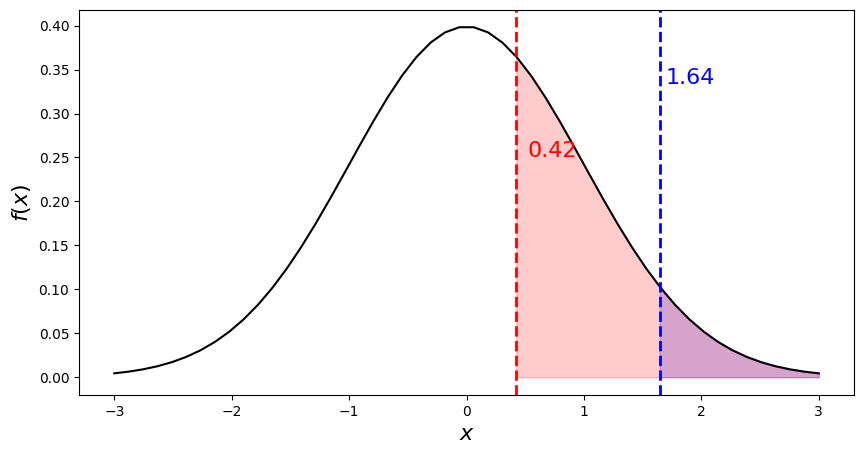

In [366]:
def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger')

__в) [10 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

In [367]:
## your code here
# (渋谷事変)

# H0: алкоголики больше склонны к курению
drinkers = df[df['is_heavy_drinker']==1]
not_drinkers=df[df['is_heavy_drinker']==0]

alpha = 0.05                                                        # уровень значимости = 5%
n1,n2 = drinkers.shape[0], not_drinkers.shape[0]                    # размеры выборок алкоголиков и трезвенников
m1,m2 = drinkers['smokes'].sum(), not_drinkers['smokes'].sum()      # число курильщиков

p1=drinkers['smokes'].mean()
p2=not_drinkers['smokes'].mean()                                    # точеные оценки долей 
diff = p1 - p2                                                      # разность долей

P = (m1 + m2)/(n1 + n2)          
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))                         # стандартное отклонение разности
                                    
z_obs = diff/diff_std                                               # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha)                                # критическое значение статистики

if z_obs < z_crit:
    print(f'z_obs = {z_obs:.3} меньше z_crit = {z_crit:.3} => НУЛЕВАЯ гипотеза не отвергается')
else:    
    print(f'z_obs = {z_obs:.3} больше z_crit = {z_crit:.3} => АЛЬЕТНАТИВНАЯ гипотеза не отвергается')

z_obs = 0.674 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается


**Вывод:**

Нулевая гипотеза о том, что алкоголики больше склонны к курению, чем не алкоголики не отвергается.

### Задача №2. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**

1) закрепление кнопки бронирования (зафиксирована при прокрутке страницы) 
2) всплывающее окно с предложением забронировать отель, после длительного нахождения пользователя на странице отеля
3) всплывающее окно с предложением забронировать отель, если отсается мало свободных номеров
4) предложение отправить письмо на e-mail с ссылкой для быстрого бронирования, если свободные номера заканчиваются
5) возможность переслать ссылку для быстрого бронирования контакту в WatsApp и т.п.
6) добавление кнопки для быстрого бронирования в поисковой выдаче


Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [368]:
df = pd.read_csv("ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [369]:
# your code here
# [✖‿✖]
df.groupby(['group', 'sex']).agg({'sex': 'count'})

sex
group   sex        
control 0     99991
        1     99881
test    0    100915
        1    101020

In [370]:
df.shape

(401807, 9)

In [371]:
df['user_id'].nunique()

401693

In [372]:
repeat_user = df.groupby(['user_id']).agg('count')
repeat_user=repeat_user[repeat_user['hotel_page']>=2].index.to_list()
repeat_user
df.set_index(['user_id']).loc[repeat_user]

# есть дефектные юзеры, у которых при одинаковом user_id разный пол и/или группа. Таких 114 человек

,Unnamed: 0,sex,datetime,district,hotel_page,payment_page,payment,group
user_id,,,,,,,,
1579097677181786,19013,0,11/08/2023 12:50 PM,Центральный федеральный округ,1,1,1,control
1579097677181786,202303,0,04/29/2024 02:15 AM,Дальневосточный федеральный округ,1,0,0,test
42519701204420431,126908,1,04/24/2024 06:34 AM,Дальневосточный федеральный округ,1,0,0,test
42519701204420431,225023,0,11/09/2023 04:07 PM,Центральный федеральный округ,1,1,0,control
82280183048871581,279401,1,04/27/2024 08:58 AM,Дальневосточный федеральный округ,1,0,0,test
...,...,...,...,...,...,...,...,...
9051947822754494590,359542,0,11/07/2023 03:12 PM,Центральный федеральный округ,1,1,1,control
9117051526918975526,46385,0,11/04/2023 07:02 AM,Центральный федеральный округ,1,1,0,control
9117051526918975526,320817,1,04/30/2024 10:02 PM,Дальневосточный федеральный округ,1,0,0,test


In [373]:
df=df.set_index('user_id').drop(repeat_user).reset_index()
df.shape

(401579, 9)

In [374]:
df.groupby(['district','group']).agg({'district': 'count'})

# В разных регионах соотношение контрольной и тестовой группы сильно разняться. Наверное, должно быть единообразие
# В Северо-Западном и Центральном федеральных округах доля тестовой группы существенно меньше, чем контрольной, 
# в то время как в остальных - наоборот (кроме Сибирского - там примерно поравну)

district
district                          group            
Дальневосточный федеральный округ control      1999
                                  test         5944
Приволжский федеральный округ     control     23985
                                  test        36348
Северо-Западный федеральный округ control     39974
                                  test        10097
Сибирский федеральный округ       control      7994
                                  test         8078
Уральский федеральный округ       control      5996
                                  test        20193
Центральный федеральный округ     control     79835
                                  test        40387
Южный федеральный округ           control     39975
                                  test        80774

In [375]:
#Сгенерировано GigaChat - расчет долей групп в разбивке по регионам

# Создаем основную группу и считаем количество записей
counts = df.groupby(['district', 'group']).size().reset_index(name='count')

# Добавляем колонку с общим количеством записей по каждому району
total_counts = counts.groupby('district')['count'].transform('sum')

# Рассчитываем долю каждой группы относительно своего района
counts['share'] = counts['count'] / total_counts

print(counts)

                             district    group  count  share
0   Дальневосточный федеральный округ  control   1999   0.25
1   Дальневосточный федеральный округ     test   5944   0.75
2       Приволжский федеральный округ  control  23985   0.40
3       Приволжский федеральный округ     test  36348   0.60
4   Северо-Западный федеральный округ  control  39974   0.80
5   Северо-Западный федеральный округ     test  10097   0.20
6         Сибирский федеральный округ  control   7994   0.50
7         Сибирский федеральный округ     test   8078   0.50
8         Уральский федеральный округ  control   5996   0.23
9         Уральский федеральный округ     test  20193   0.77
10      Центральный федеральный округ  control  79835   0.66
11      Центральный федеральный округ     test  40387   0.34
12            Южный федеральный округ  control  39975   0.33
13            Южный федеральный округ     test  80774   0.67


In [376]:
print(df['group'].value_counts())
df.groupby(['group', 'payment']).agg({'payment': 'count'})

group
test       201821
control    199758
Name: count, dtype: int64


payment
group   payment         
control 0         149784
        1          49974
test    0         134435
        1          67386

In [377]:
df['part_of_day'] = df['datetime'].str[-2:]
df.groupby(['group', 'part_of_day']).agg({'part_of_day': 'count'})

part_of_day
group   part_of_day             
control AM                 99840
        PM                 99918
test    AM                 99746
        PM                102075

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [378]:
# your code here
# ┌(ಠ_ಠ)┘

conversion_general = df.groupby(['district']).agg({
    'hotel_page' : 'sum',
    'payment_page' : 'sum',
    'payment' : 'sum'
})
conversion_general['share_payment_page'] = conversion_general['payment_page'] *100 / conversion_general['hotel_page']
conversion_general['share_payment'] = conversion_general['payment'] *100 / conversion_general['payment_page']

pd.options.display.float_format = '{:,.2f}'.format
conversion_general

# В ДФО конверсия в оплату больше, чем конверсия в страницу оплаты
# В Сибирском федеральном округе конверсия в оплату почти 100%
# В ЦФО и ЮФО очень высокая конверсия в страницу оплаты (91% и 81% соответственно), но реальных оплат всего 30% и 38% соответственно

,hotel_page,payment_page,payment,share_payment_page,share_payment
district,,,,,
Дальневосточный федеральный округ,7943,1412,2455,17.78,173.87
Приволжский федеральный округ,60333,38017,18205,63.01,47.89
Северо-Западный федеральный округ,50071,35252,13416,70.40,38.06
Сибирский федеральный округ,16072,4983,4637,31.00,93.06
Уральский федеральный округ,26189,11485,8112,43.85,70.63
Центральный федеральный округ,120222,109400,33398,91.00,30.53
Южный федеральный округ,120749,97407,37137,80.67,38.13


In [379]:
#конверсия в разрезе групп
conversion_group = df.groupby(['district', 'group']).agg({
    'hotel_page' : 'sum',
    'payment_page' : 'sum',
    'payment' : 'sum'
})
conversion_group['share_payment_page'] = conversion_group['payment_page'] *100 / conversion_group['hotel_page']
conversion_group['share_payment'] = conversion_group['payment'] *100 / conversion_group['payment_page']

conversion_group

hotel_page  payment_page  payment  \
district                          group                                        
Дальневосточный федеральный округ control        1999           200      464   
                                  test           5944          1212     1991   
Приволжский федеральный округ     control       23985         14391     6046   
                                  test          36348         23626    12159   
Северо-Западный федеральный округ control       39974         27982    10063   
                                  test          10097          7270     3353   
Сибирский федеральный округ       control        7994          2398     1969   
                                  test           8078          2585     2668   
Уральский федеральный округ       control        5996          2398     1446   
                                  test          20193          9087     6666   
Центральный федеральный округ     control       79835         71840    20021   
                                  test          40387         37560    13377   
Южный федеральный округ           control       39975         31980     9965   
                                  test          80774         65427    27172   

                                           share_payment_page  share_payment  
district                          group                                       
Дальневосточный федеральный округ control               10.01         232.00  
                                  test                  20.39         164.27  
Приволжский федеральный округ     control               60.00          42.01  
                                  test                  65.00          51.46  
Северо-Западный федеральный округ control               70.00          35.96  
                                  test                  72.00          46.12  
Сибирский федеральный округ       control               30.00          82.11  
                                  test                  32.00         103.21  
Уральский федеральный округ       control               39.99          60.30  
                                  test                  45.00          73.36  
Центральный федеральный округ     control               89.99          27.87  
                                  test                  93.00          35.62  
Южный федеральный округ           control               80.00          31.16  
                                  test                  81.00          41.53

In [380]:
# H0 : конверсия в страницу оплаты в тестовой группе выше, чем в контрольной
print("H0 : конверсия в страницу оплаты в тестовой группе выше, чем в контрольной")
print("HA : конверсия в страницу оплаты в  контрольной группе выше, чем в тестовой")
alpha = 0.05                                                        # уровень значимости = 5%
for district in df['district'].unique(): 
    print()
    print(district)
    district_info=conversion_group.loc[district]

    n_control = district_info.loc['control'].loc['hotel_page']
    n_test = district_info.loc['test'].loc['hotel_page']            # размеры выборок 

    m_control = district_info.loc['control'].loc['payment_page']
    m_test = district_info.loc['test'].loc['payment_page']          # число переходов на страницу оплаты

    p_control=district_info.loc['control'].loc['share_payment_page']/100
    p_test=district_info.loc['test'].loc['share_payment_page'] /100    # точеные оценки долей 
    diff = p_control - p_test                                       # разность долей

    P = (m_control + m_test)/(n_control + n_test)          
    diff_std = np.sqrt(P*(1 - P)*(1/n_control + 1/n_test))          # стандартное отклонение разности
                                        
    z_obs = diff/diff_std                                           # наблюдаемое значение статистики 
    z_crit = stats.norm.ppf(1 - alpha)                            # критическое значение статистики

    if z_obs < z_crit:
        print(f'z_obs = {z_obs:.3} меньше z_crit = {z_crit:.3} => НУЛЕВАЯ гипотеза не отвергается')
    else:    
        print(f'z_obs = {z_obs:.3} больше z_crit = {z_crit:.3} => АЛЬЕТНАТИВНАЯ гипотеза не отвергается')

H0 : конверсия в страницу оплаты в тестовой группе выше, чем в контрольной
HA : конверсия в страницу оплаты в  контрольной группе выше, чем в тестовой

Южный федеральный округ
z_obs = -4.14 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Центральный федеральный округ
z_obs = -17.2 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Северо-Западный федеральный округ
z_obs = -3.94 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Приволжский федеральный округ
z_obs = -12.4 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Уральский федеральный округ
z_obs = -6.86 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Сибирский федеральный округ
z_obs = -2.75 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Дальневосточный федеральный округ
z_obs = -10.5 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается


In [381]:
# H0 : конверсия в оплатy в тестовой группе выше, чем в контрольной
print("H0 : конверсия в оплату в тестовой группе выше, чем в контрольной")
print("HA : конверсия в оплату в  контрольной группе выше, чем в тестовой")

alpha = 0.05                                                        # уровень значимости = 5%
for district in df['district'].unique(): 
    print()
    print(district)
    district_info=conversion_group.loc[district]

    n_control = district_info.loc['control'].loc['payment_page']
    n_test = district_info.loc['test'].loc['payment_page']            # размеры выборок 

    m_control = district_info.loc['control'].loc['payment']
    m_test = district_info.loc['test'].loc['payment']          # число переходов на страницу оплаты

    p_control=district_info.loc['control'].loc['share_payment'] /100
    p_test=district_info.loc['test'].loc['share_payment'] /100    # точеные оценки долей 
    diff = p_control - p_test                                       # разность долей

    P = (m_control + m_test)/(n_control + n_test)          
    diff_std = np.sqrt(P*(1 - P)*(1/n_control + 1/n_test))          # стандартное отклонение разности
                                        
    z_obs = diff/diff_std                                           # наблюдаемое значение статистики 
    z_crit = stats.norm.ppf(1 - alpha)                            # критическое значение статистики
    
    if z_obs < z_crit:
        print(f'z_obs = {z_obs:.3} меньше z_crit = {z_crit:.3} => НУЛЕВАЯ гипотеза не отвергается')
    else:    
        print(f'z_obs = {z_obs:.3} больше z_crit = {z_crit:.3} => АЛЬЕТНАТИВНАЯ гипотеза не отвергается')

H0 : конверсия в оплату в тестовой группе выше, чем в контрольной
HA : конверсия в оплату в  контрольной группе выше, чем в тестовой

Южный федеральный округ
z_obs = -31.3 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Центральный федеральный округ
z_obs = -26.4 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Северо-Западный федеральный округ
z_obs = -15.9 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Приволжский федеральный округ
z_obs = -17.9 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Уральский федеральный округ
z_obs = -12.5 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Сибирский федеральный округ
z_obs = -29.3 меньше z_crit = 1.64 => НУЛЕВАЯ гипотеза не отвергается

Дальневосточный федеральный округ
z_obs = nan больше z_crit = 1.64 => АЛЬЕТНАТИВНАЯ гипотеза не отвергается


C:\Users\admin\AppData\Local\Temp\ipykernel_6288\1040580167.py:22: RuntimeWarning: invalid value encountered in sqrt
  diff_std = np.sqrt(P*(1 - P)*(1/n_control + 1/n_test))          # стандартное отклонение разности


In [ ]:
#ВЫВОД:

# Во всех регионах конверсия в страницу оплаты и конверсия в оплату выше в контрольной группе
# В Дальневосточном федеральном округе оплат было больше, чем перерходов на страницу оплаты

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [261]:
# your code here
# =^･ｪ･^=

conversion_group_without_districts = df.groupby(['group']).agg({
    'hotel_page' : 'sum',
    'payment_page' : 'sum',
    'payment' : 'sum'
})
conversion_group_without_districts['share_payment_page'] = conversion_group_without_districts['payment_page'] *100 / conversion_group_without_districts['hotel_page']
conversion_group_without_districts['share_payment'] = conversion_group_without_districts['payment'] *100 / conversion_group_without_districts['payment_page']

conversion_group_without_districts

,hotel_page,payment_page,payment,share_payment_page,share_payment
group,,,,,
control,199758,151189,49974,75.69,33.05
test,201821,146767,67386,72.72,45.91


In [382]:
# H0 : конверсия в страницу оплаты в тестовой группе выше, чем в контрольной
print("H0 : конверсия в страницу оплаты в тестовой группе выше, чем в контрольной")
print("HA : конверсия в страницу оплаты в  контрольной группе выше, чем в тестовой")

alpha = 0.05                                                        # уровень значимости = 5%

n_control = conversion_group_without_districts.loc['control'].loc['hotel_page']
n_test = conversion_group_without_districts.loc['test'].loc['hotel_page']            # размеры выборок 

m_control = conversion_group_without_districts.loc['control'].loc['payment_page']
m_test = conversion_group_without_districts.loc['test'].loc['payment_page']          # число переходов на страницу оплаты

p_control=conversion_group_without_districts.loc['control'].loc['share_payment_page'] /100
p_test=conversion_group_without_districts.loc['test'].loc['share_payment_page']  / 100    # точеные оценки долей 
diff = p_control - p_test                                      # разность долей

P = (m_control + m_test)/(n_control + n_test)          
diff_std = np.sqrt(P*(1 - P)*(1/n_control + 1/n_test))          # стандартное отклонение разности
                                    
z_obs = diff/diff_std                                           # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha)                            # критическое значение статистики

if z_obs < z_crit:
    print(f'z_obs = {z_obs:.3} меньше z_crit = {z_crit:.3} => НУЛЕВАЯ гипотеза не отвергается')
else:    
    print(f'z_obs = {z_obs:.3} больше z_crit = {z_crit:.3} => АЛЬЕТНАТИВНАЯ гипотеза не отвергается')

H0 : конверсия в страницу оплаты в тестовой группе выше, чем в контрольной
HA : конверсия в страницу оплаты в  контрольной группе выше, чем в тестовой
z_obs = 21.5 больше z_crit = 1.64 => АЛЬЕТНАТИВНАЯ гипотеза не отвергается


In [383]:
# H0 : конверсия в оплатy в тестовой группе выше, чем в контрольной
print("H0 : конверсия в оплату в тестовой группе выше, чем в контрольной")
print("HA : конверсия в оплату в  контрольной группе выше, чем в тестовой")

alpha = 0.05                                                        # уровень значимости = 5%

n_control = conversion_group_without_districts.loc['control'].loc['payment_page']
n_test = conversion_group_without_districts.loc['test'].loc['payment_page']            # размеры выборок 

m_control = conversion_group_without_districts.loc['control'].loc['payment']
m_test = conversion_group_without_districts.loc['test'].loc['payment']          # число переходов на страницу оплаты

p_control=conversion_group_without_districts.loc['control'].loc['share_payment']
p_test=conversion_group_without_districts.loc['test'].loc['share_payment']      # точеные оценки долей 
diff = p_test - p_control                                       # разность долей

P = (m_control + m_test)/(n_control + n_test)          
diff_std = np.sqrt(P*(1 - P)*(1/n_control + 1/n_test))          # стандартное отклонение разности
                                    
z_obs = diff/diff_std                                           # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha)                            # критическое значение статистики

if z_obs < z_crit:
    print(f'z_obs = {z_obs:.3} меньше z_crit = {z_crit:.3} => НУЛЕВАЯ гипотеза не отвергается')
else:    
    print(f'z_obs = {z_obs:.3} больше z_crit = {z_crit:.3} => АЛЬЕТНАТИВНАЯ гипотеза не отвергается')

H0 : конверсия в оплату в тестовой группе выше, чем в контрольной
HA : конверсия в оплату в  контрольной группе выше, чем в тестовой
z_obs = 7.18e+03 больше z_crit = 1.64 => АЛЬЕТНАТИВНАЯ гипотеза не отвергается


__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

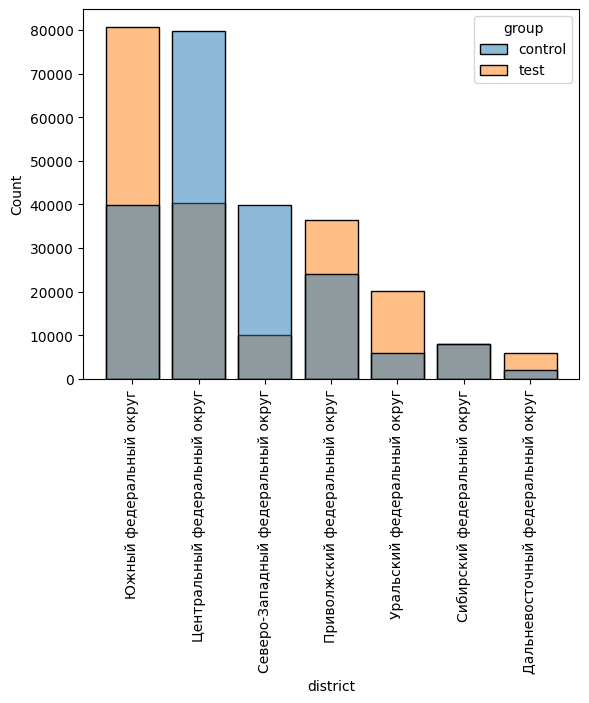

In [ ]:
# your code here
# (⊙_⊙)
sns.histplot(data=df, x="district", hue="group", shrink=.8)
plt.xticks(rotation=90)
plt.show()

# ВЫВОДЫ:
# Больше всего пользователи из контрольной группы интересовались Центральным федеральным огкругом, 
# а ползователи из тестовой группы - Южным федеральным округом
# Пользователи из контрольной группы больше интересовались Северо-Западным фед.округом, чем пользователи из тестовой группы,
# в то время как пользователи из тестовой группы больше интересовались Уральским и Приволжским федеральными округами, чем пользователи из контрольной группы

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'> 

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:**

Мне кажется дело в том, что в разных регионах соотношение контрольной и тестовой группы сильно разняться (дисбаланс), что оказывает влияние на итоговый результат. Если смотреть в целом, без разделения на регионы, то соотношение контрольной и тестовой групп примерно 50 на 50.

## Задача №3: Не подглядывать! (50 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [425]:
# your code here
# (♡-_-♡) 

mu_A=100
sigma_A=40
MDE=5
alpha=0.05
beta=0.2
sigma_B=20
DAU=200

z_crit_alpha=stats.norm.ppf(1 - alpha)
z_crit_beta=stats.norm.ppf(1 - beta)

n_one_group = ( (sigma_A**2 + sigma_B**2) * ((z_crit_alpha + z_crit_beta)**2) ) / MDE**2
n = n_one_group * 2 # т.к. группы две А и Б
days=n/DAU

print(f'Количество наблюдений {round(n)}, длительность АБ-теста {round(days, 2)}')

Количество наблюдений 989, длительность АБ-теста 4.95


In [426]:
from statsmodels.stats.power import zt_ind_solve_power

# параметр ratio отвечает за то в какой из двух выборок больше наблюдений
sample_size = zt_ind_solve_power(
                    effect_size=0.05,      # стандартизованный размер эффекта
                    nobs1=None,           # число наблюдений None, тк их хотим найти 
                    alpha=alpha,          # уровень значимости 
                    power=(1 - beta),     # мощность
                    ratio=1,              # перекос в выборках, если 0, тогда выборка только одна
                    alternative='larger'  # альтернатива
                )

print(sample_size) # 

4946.045785628647


__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [438]:
# your code here
# ヽ(♡‿♡)ノ

mu_B=105
group_A = np.random.normal(mu_A, sigma_A, round(n_one_group))
group_B = np.random.normal(mu_B, sigma_B, round(n_one_group))

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [ ]:
# your code here
# (´｡• ᵕ •｡`) 

group_A.mean()
group_B.mean()


100.01745254419029

In [451]:
def generate_daily_samples(days, mu_A, mu_B, sigma_A, sigma_B, n_one_group):
    """
    Генерирует ежедневные выборки для группы A и B
    """

    samples_a = []
    samples_b = []

    for _ in range(days):
        group_A = np.random.normal(mu_A, sigma_A, n_one_group)
        group_B = np.random.normal(mu_B, sigma_B, n_one_group)
        samples_a.append(group_A)
        samples_b.append(group_B)
    return samples_a, samples_b


def calculate_stats_per_day(samples_a, samples_b):
    """
    Вычисляем статистику (среднее и p-value) на каждый день
    """
    results = []
    cumulative_a = []  # Накопленный список элементов группы A
    cumulative_b = []  # Накопленный список элементов группы Б
    
    for i in range(len(samples_a)):
        cumulative_a.extend(samples_a[i])
        cumulative_b.extend(samples_b[i])
        
        # Вычисление среднего для каждой группы
        mean_a = np.mean(cumulative_a)
        mean_b = np.mean(cumulative_b)
        
        # T-тест для текущих совокупных данных
        _, p_value = stats.ttest_ind(cumulative_a, cumulative_b)
        
        results.append({
            'day': i + 1,
            'mean_group_A': mean_a,
            'mean_group_B': mean_b,
            'p_value': p_value
        })
    
    df = pd.DataFrame(results)
    return df

In [452]:
# Генерируем ежедневные выборки
samples_a, samples_b = generate_daily_samples(50, mu_A, mu_B, sigma_A, sigma_B, round(n_one_group))

# Рассчитываем статистику для каждого дня
df = calculate_stats_per_day(samples_a, samples_b)

# Выведем первые строки результата
print(df.head())

   day  mean_group_A  mean_group_B  p_value
0    1        101.56        104.25     0.19
1    2        100.64        105.09     0.00
2    3        101.25        104.90     0.00
3    4        100.87        104.98     0.00
4    5        100.87        105.02     0.00


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

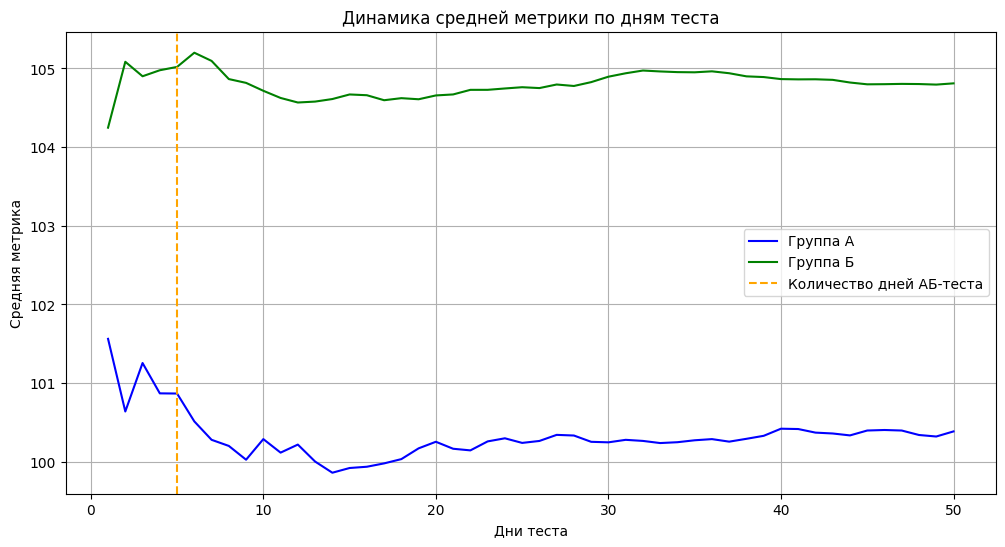

In [453]:
# your code here
# (´｡• ᵕ •｡`) 

plt.figure(figsize=(12, 6))

plt.plot(df['day'], df['mean_group_A'], label='Группа A', color='blue')
plt.plot(df['day'], df['mean_group_B'], label='Группа Б', color='green')

plt.xlabel('Дни теста')
plt.ylabel('Средняя метрика')
plt.title('Динамика средней метрики по дням теста')

plt.axvline(x=round(days), linestyle='--', color='orange', label='Количество дней АБ-теста')

plt.legend()
plt.grid(True)
plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

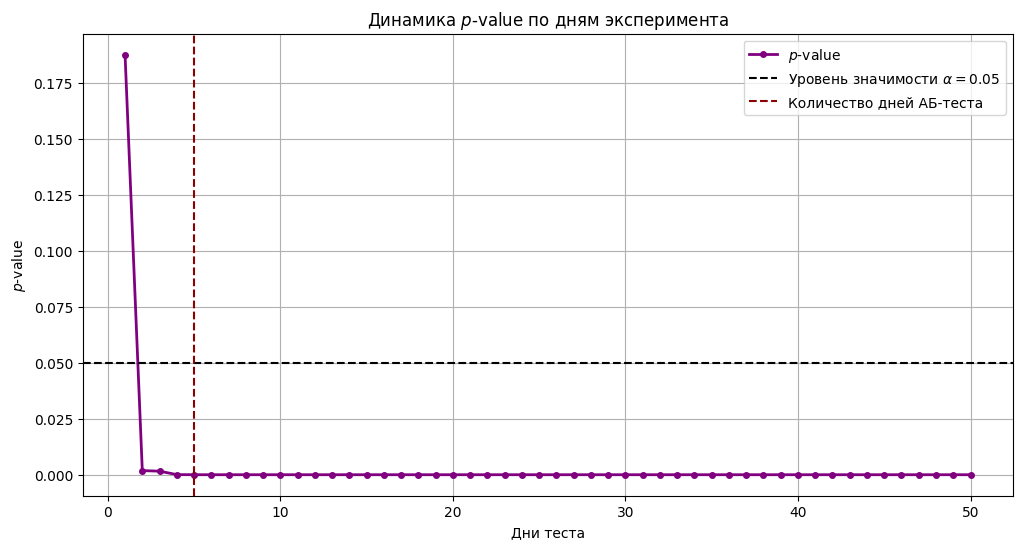

In [458]:
# your code here
# (´｡• ᵕ •｡`) 

plt.figure(figsize=(12, 6))

plt.plot(df['day'], df['p_value'], marker='o', markersize=4, linewidth=2, color='purple', label='$p$-value')
plt.axhline(y=alpha, color='black', linestyle='dashed', label=f'Уровень значимости $\\alpha={alpha}$')
plt.axvline(x=round(days), color='darkred', linestyle='--', label='Количество дней АБ-теста')

plt.xlabel('Дни теста')
plt.ylabel('$p$-value')
plt.title('Динамика $p$-value по дням эксперимента')

plt.legend()
plt.grid(True)
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

In [497]:
# your thoughts here  
# (◕‿◕)♡

def repeat_experiment(X, mu_A, mu_B, sigma_A, sigma_B, n_one_group):
    samples_a, samples_b = generate_daily_samples(X, mu_A, mu_B, sigma_A, sigma_B, n_one_group)
    df = calculate_stats_per_day(samples_a, samples_b)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

    ax[0].plot(df['day'], df['mean_group_A'], label='Группа A', color='blue')
    ax[0].plot(df['day'], df['mean_group_B'], label='Группа Б', color='green')

    ax[0].set_xlabel('Дни теста')
    ax[0].set_ylabel('Средняя метрика')
    ax[0].set_title('Динамика средней метрики по дням теста')

    ax[0].axvline(x=round(days), linestyle='--', color='orange', label='Количество дней АБ-теста')

    ax[0].legend()
    ax[0].grid(True)


    ax[1].plot(df['day'], df['p_value'], marker='o', markersize=4, linewidth=2, color='purple', label='$p$-value')
    ax[1].axhline(y=alpha, color='black', linestyle='dashed', label=f'Уровень значимости $\\alpha={alpha}$')
    ax[1].axvline(x=round(days), color='darkred', linestyle='--', label='Количество дней АБ-теста')

    ax[1].set_xlabel('Дни теста')
    ax[1].set_ylabel('$p$-value')
    ax[1].set_title('Динамика $p$-value по дням эксперимента')

    ax[1].legend()
    ax[1].grid(True)
    plt.show()

    return

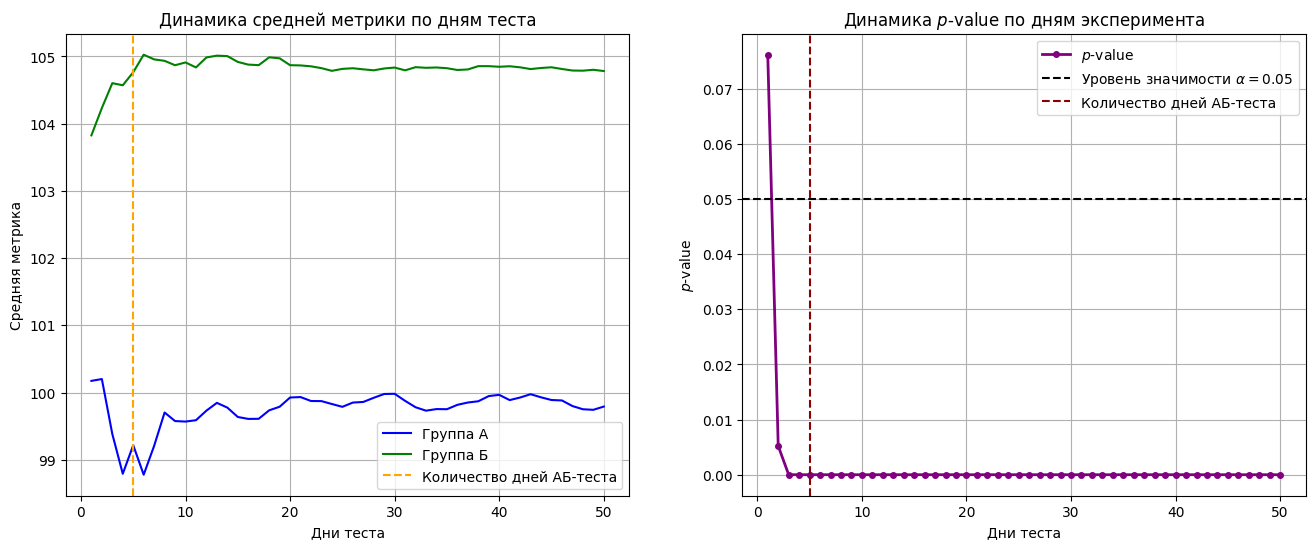

In [500]:
X=50
n_one_group=round(n_one_group)
repeat_experiment(X, mu_A, mu_B, sigma_A, sigma_B, n_one_group)

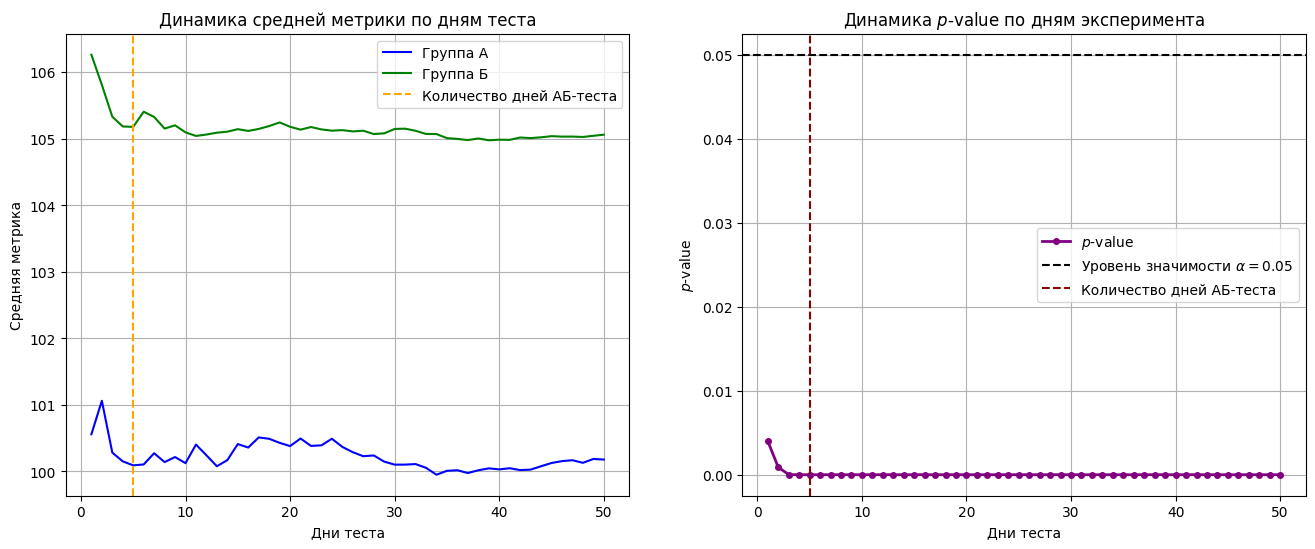

In [499]:
repeat_experiment(X, mu_A, mu_B, sigma_A, sigma_B, round(n_one_group))

In [ ]:
#ВЫВОДЫ:

# значение метрики после точки количества дней АБ-теста сходится к матожиданию группы

# в периоде до количества дней АБ-теста значение p-value снижается
# в точке количества дней АБ-теста значение p-value снижается ниже уровня значимости alpha, достигает минимума
# в период после количества дней АБ-теста значение p-value выходит на плато

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

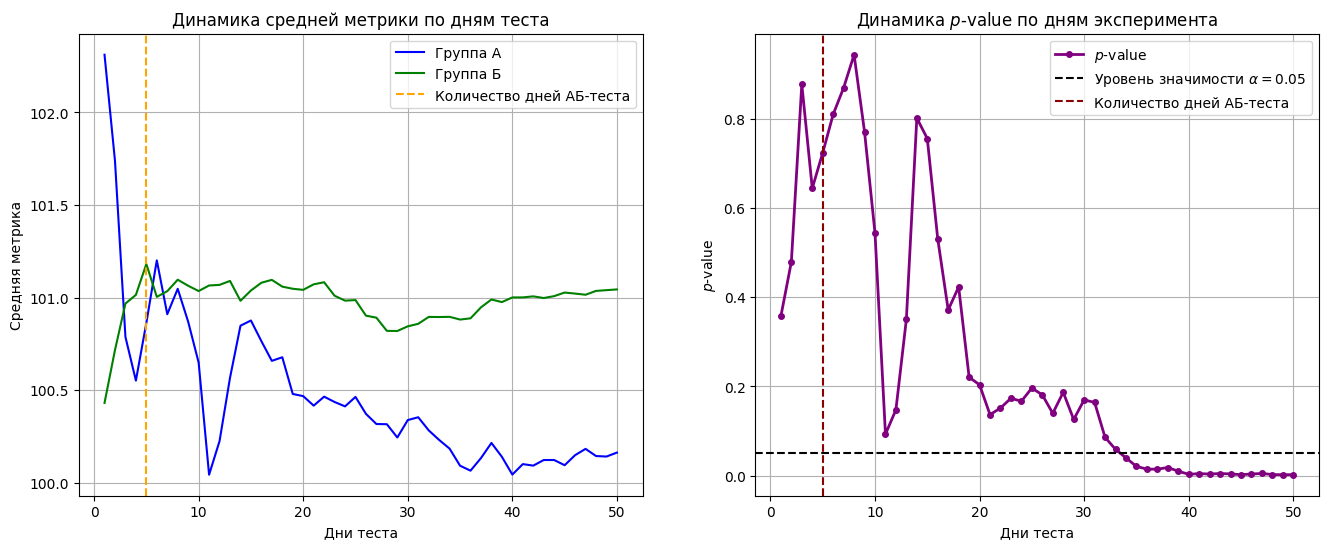

In [502]:
# your code and thoughts here
# ♡ (´｡• ω •｡`) ♡
repeat_experiment(X, mu_A, mu_B=101, sigma_A=sigma_A, sigma_B=sigma_B, n_one_group=n_one_group)

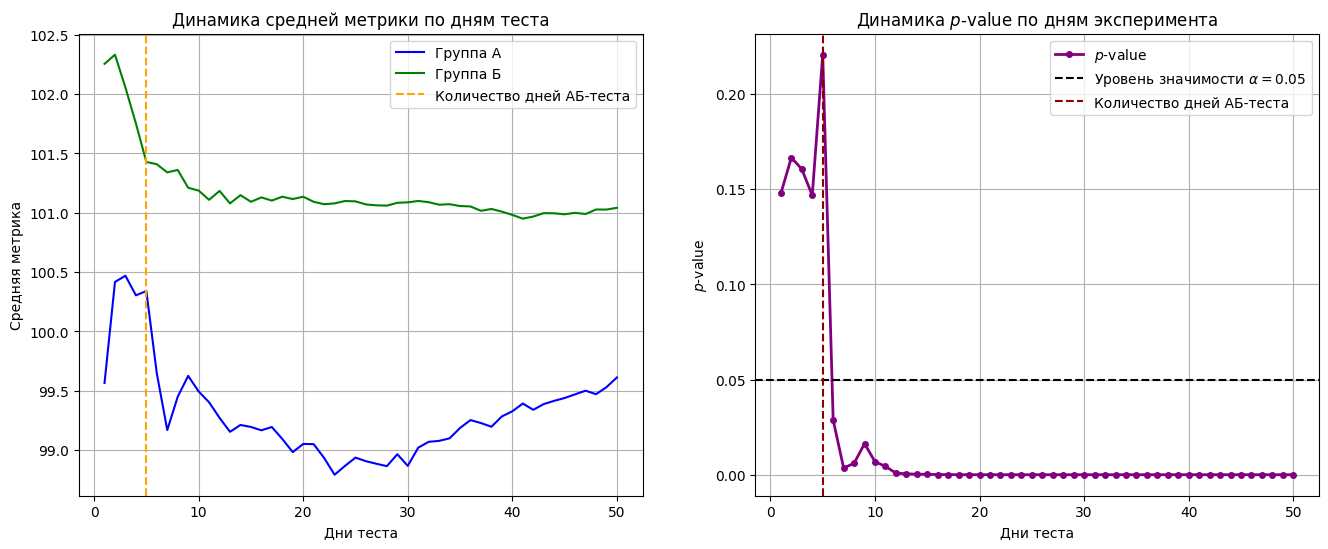

In [503]:
repeat_experiment(X, mu_A, mu_B=101, sigma_A=sigma_A, sigma_B=sigma_B, n_one_group=n_one_group)

In [ ]:
#ВЫВОДЫ:

# После снижения MDE коридор значений p-value значительно расширяется: максимальное значение значительно превышает уровень значимости alpha
# После снижения MDE значение p-value не достигает минимума в точке количества дней АБ-теста. 

__в) [20 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

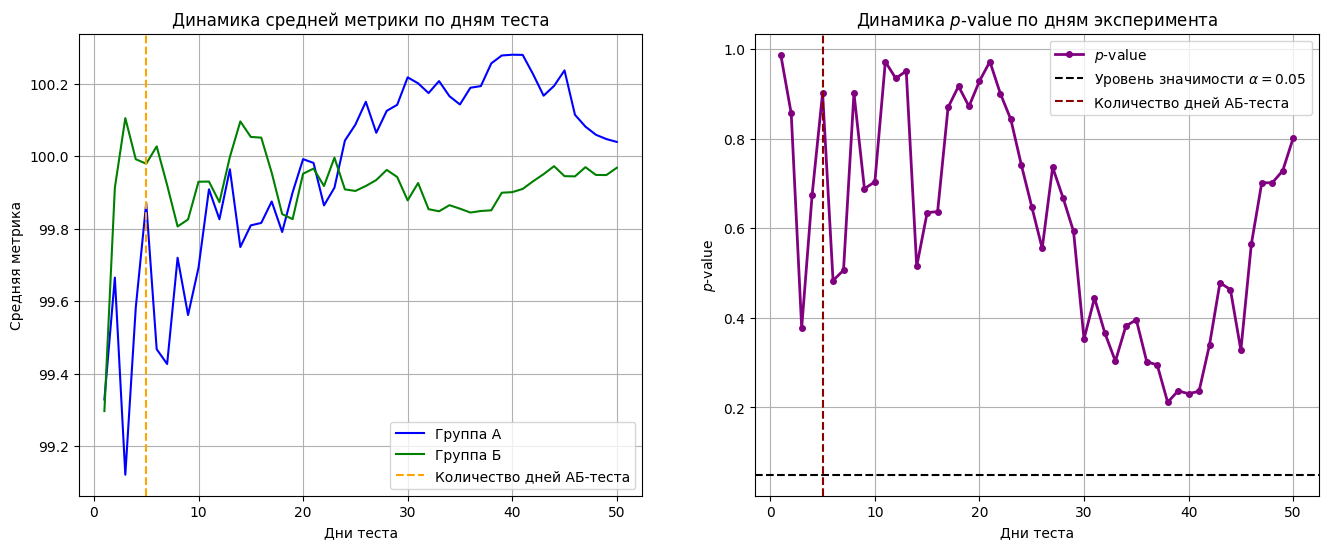

In [505]:
# your code and thoughts here
# =^･ｪ･^=

repeat_experiment(X, mu_A=100, mu_B=100, sigma_A=sigma_A, sigma_B=sigma_B, n_one_group=n_one_group)

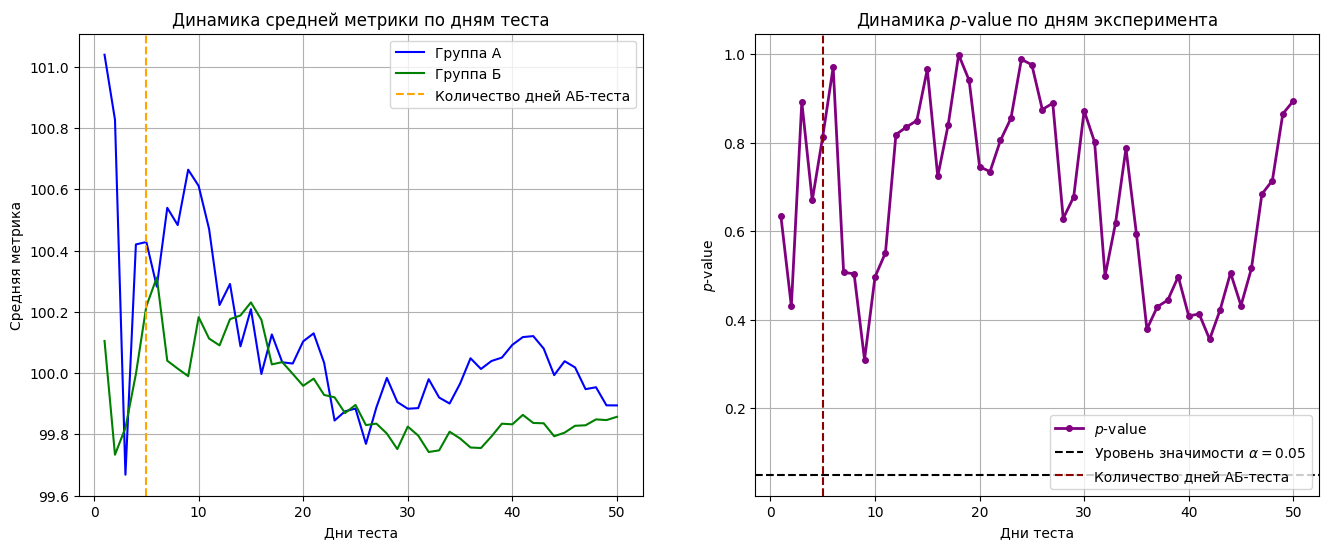

In [506]:
repeat_experiment(X, mu_A=100, mu_B=100, sigma_A=sigma_A, sigma_B=sigma_B, n_one_group=n_one_group)

In [ ]:
#ВЫВОДЫ:

# значение p-value значительно превышает уровень значимости alpha

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

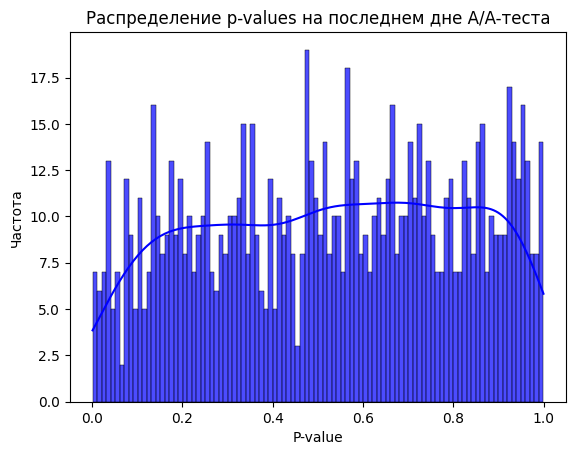

In [545]:
p_values = []
for _ in range(1000):
    samples_A1, samples_A2 = generate_daily_samples(round(days), mu_A, mu_A, sigma_A, sigma_A, n_one_group)
    df_AA = calculate_stats_per_day(samples_A1, samples_A2)
    p_values.append(df_AA['p_value'][4])

sns.histplot(p_values, bins=100, alpha=0.7, color='b', kde=True)
plt.title('Распределение p-values на последнем дне A/A-теста')
plt.xlabel('P-value')
plt.ylabel('Частота')
plt.show()

In [ ]:
#ВЫВОДЫ:

#распределение стремится к равномерному, судя по kde - ?